# 1. Introduction

# 2. Import Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set(style="whitegrid")

# 3. Load Dataset

In [3]:
df = pd.read_csv(r"C:\Users\HP\Downloads\Projects\NetflixEDA\netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


#  4. Initial Exploration

In [4]:
df.shape

(8807, 12)

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

# 5. Data Cleaning

In [9]:
# Drop the Deuplicate Values
df.drop_duplicates(inplace=True)

In [11]:
# Fill nulls in 'country', 'cast', 'director'
df['country'] = df['country'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Not Available')
df['director'] = df['director'].fillna('Not Available')

df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors='coerce')


In [12]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [14]:
# Here I removed these rowes because they are low in the quantity and they dont affect more to the model
df = df[df['date_added'].notna()] 

In [18]:
# Here also
df = df[df['rating'].notna() & df['duration'].notna()]

In [19]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

# 6. EDA & Visualization

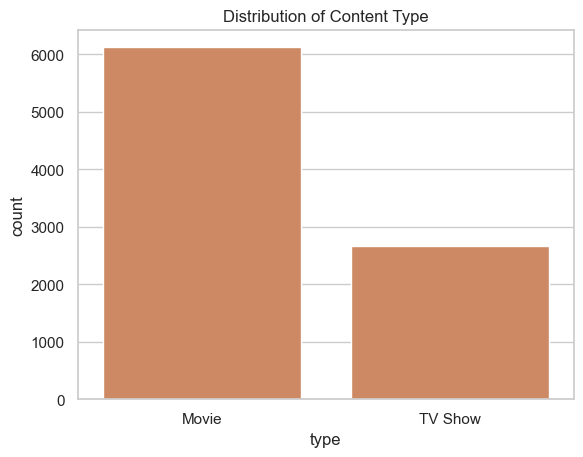

In [22]:
sns.countplot(data=df, x='type')
plt.title("Distribution of Content Type")
plt.show()

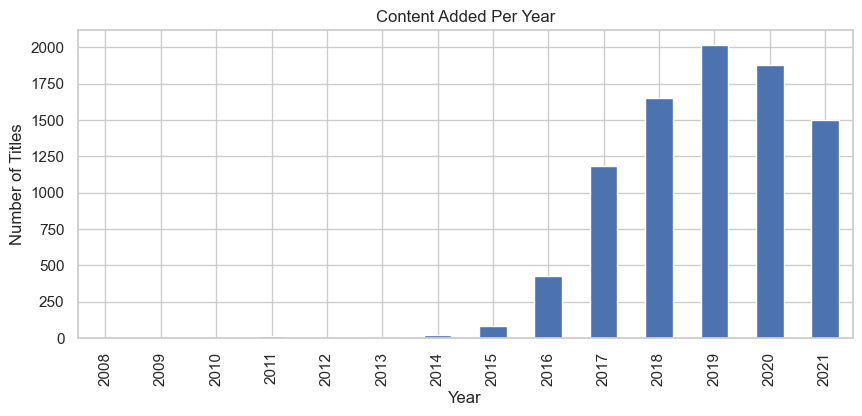

In [23]:
df['year_added'] = df['date_added'].dt.year
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,4))
plt.title("Content Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()

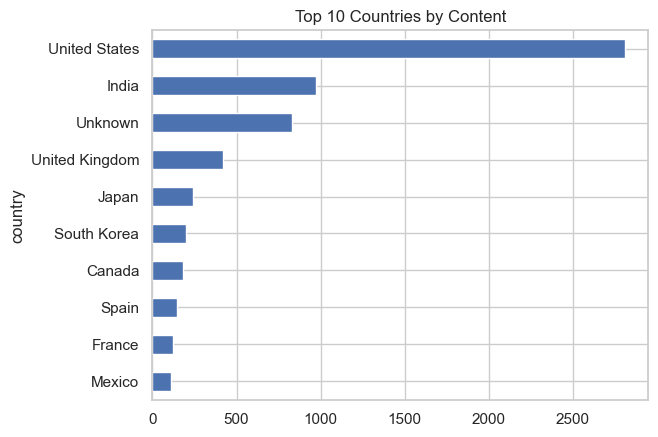

In [24]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', title='Top 10 Countries by Content')
plt.gca().invert_yaxis()
plt.show()

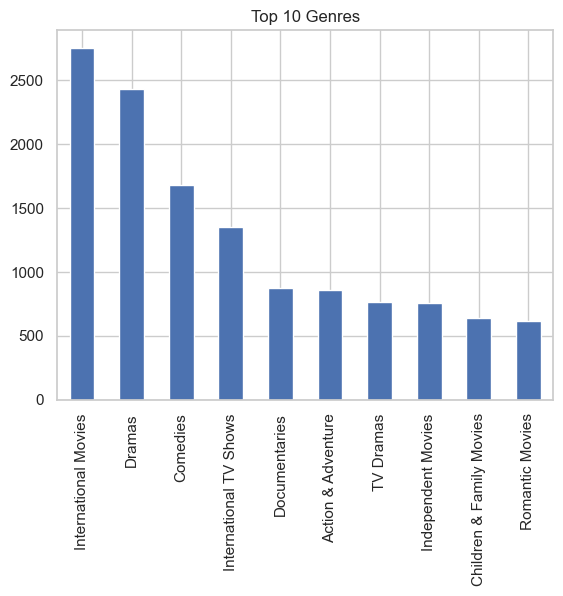

In [25]:
from collections import Counter

genre_list = sum(df['listed_in'].dropna().apply(lambda x: x.split(',')).tolist(), [])
genre_freq = Counter([genre.strip() for genre in genre_list])
pd.Series(genre_freq).sort_values(ascending=False).head(10).plot(kind='bar', title='Top 10 Genres')
plt.show()

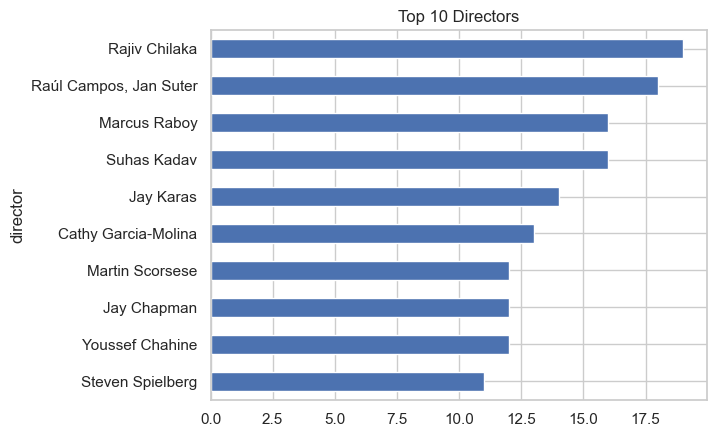

In [26]:
top_directors = df[df['director'] != 'Not Available']['director'].value_counts().head(10)
top_directors.plot(kind='barh', title='Top 10 Directors')
plt.gca().invert_yaxis()
plt.show()

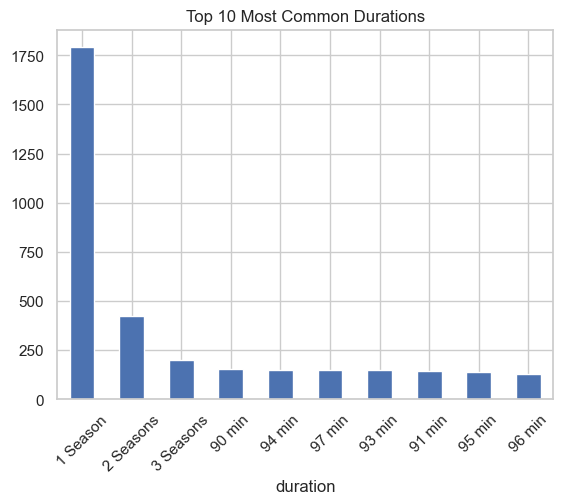

In [27]:
df['duration'].dropna().value_counts().head(10).plot(kind='bar', title='Top 10 Most Common Durations')
plt.xticks(rotation=45)
plt.show()

# 7. Key Insights

# Conclusion